### Analyze identification accuracy results across epochs, saving to CSV files.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("/sfs/weka/scratch/eyf3gu/DS4002/DS4002Project3/SCRIPTS/epoch_results.csv")

In [10]:
df.head()

,epoch,filename,true_class,predicted_class,confidence
0,1,America-Ferrera/001.jpg,0,24,0.275752
1,1,America-Ferrera/002.jpg,0,21,0.686713
2,1,America-Ferrera/003.jpg,0,14,0.382897
3,1,America-Ferrera/004.jpg,0,19,0.433714
4,1,America-Ferrera/005.jpg,0,21,0.710162


In [11]:
df.describe()

,epoch,true_class,predicted_class,confidence
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,50.500000,12.000000,12.279240,0.908729
std,28.866142,7.211121,7.173968,0.187117
min,1.000000,0.000000,0.000000,0.096969
25%,25.750000,6.000000,6.000000,0.951111
50%,50.500000,12.000000,13.000000,0.999823
75%,75.250000,18.000000,19.000000,0.999999
max,100.000000,24.000000,24.000000,1.000000


In [ ]:
# create a dataframe which isolates the images which were misidentified (i.e: their predicted celebrity class does not matc their actual celebrity class)
wrong_df = df[df["true_class"] != df["predicted_class"]]

In [ ]:
wrong_df.describe() # describe the data. 

,epoch,true_class,predicted_class,confidence
count,38682.000000,38682.000000,38682.000000,38682.000000
mean,41.927977,12.076987,13.520759,0.668982
std,31.026270,7.378009,7.054647,0.243447
min,1.000000,0.000000,0.000000,0.096969
25%,11.000000,5.000000,8.000000,0.468487
50%,40.000000,12.000000,14.000000,0.675275
75%,69.000000,19.000000,20.000000,0.904466
max,100.000000,24.000000,24.000000,1.000000


In [ ]:
wrong_df.to_csv('incorrect_guesses.csv', index=False) # save to csv

In [ ]:
# look at the number of wrong guesses that were made in each epoch. We expect that the number of guesses will decrease as the rounds progress,
# due to the model's improved efficiency and accuracy.
incorrect_per_epoch = wrong_df.groupby("epoch").size().reset_index(name="wrong_guesses")


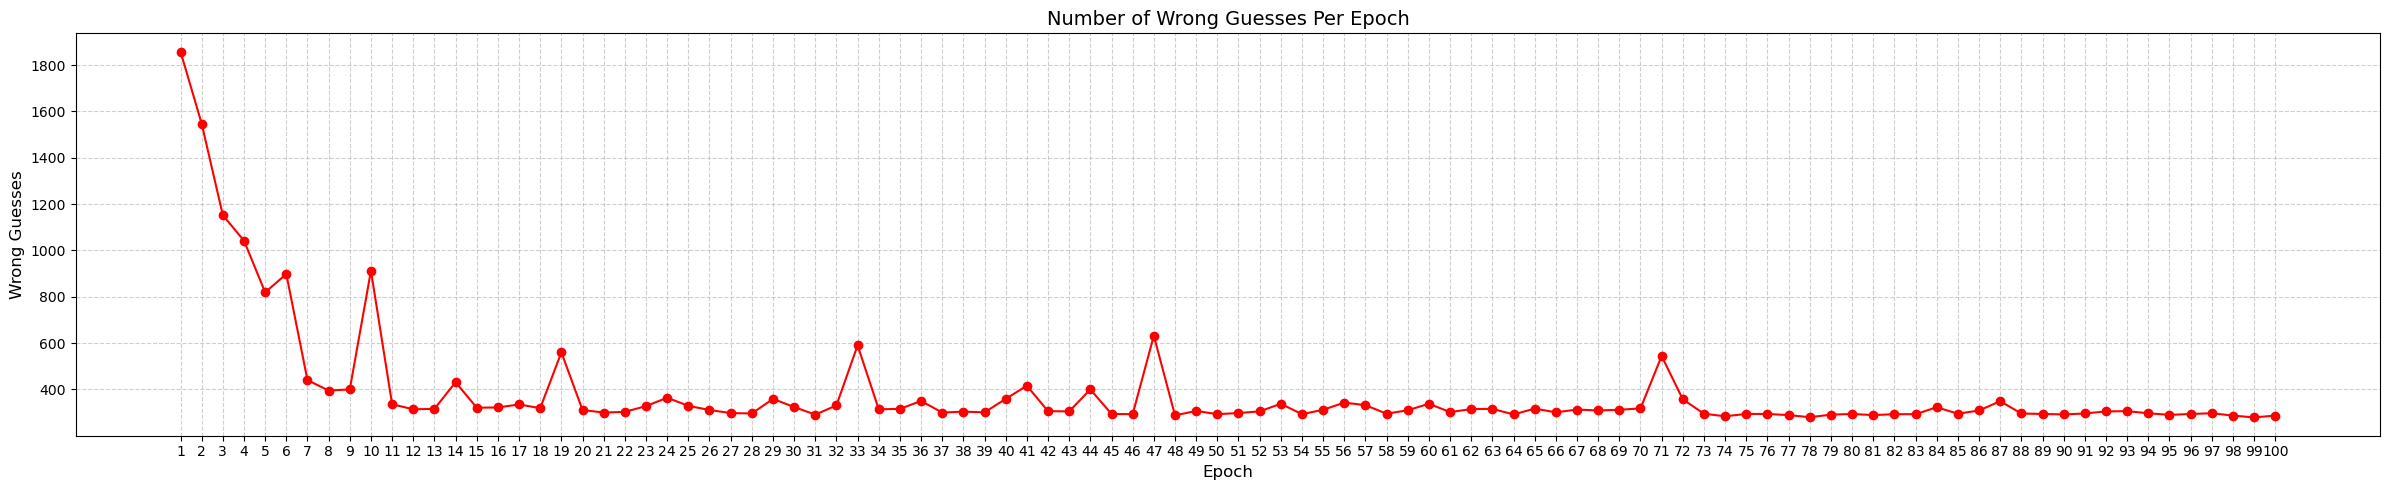

In [ ]:
plt.figure(figsize=(24, 5))
plt.plot(incorrect_per_epoch["epoch"], incorrect_per_epoch["wrong_guesses"], marker="o", linestyle="-", color="red")
plt.title("Number of Wrong Guesses Per Epoch", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Wrong Guesses", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(incorrect_per_epoch["epoch"])  # Ensure only epoch values are on the x-axis
plt.tight_layout()

# Show the plot
plt.show()

# this graph confirms that idenification accuracy did improve over times, with decreasing wrong guesses as the rounds progressed.

In [ ]:
# now, let's isolate the incorrectly identified images for the final round (epoch 100)

epoch_100_wrong = wrong_df[wrong_df["epoch"] == 100]

In [ ]:

epoch_100_wrong.head()

,epoch,filename,true_class,predicted_class,confidence
198004,100,America-Ferrera/005.jpg,0,21,0.880575
198020,100,America-Ferrera/021.jpg,0,22,0.515396
198024,100,America-Ferrera/025.jpg,0,24,0.999873
198026,100,America-Ferrera/027.jpg,0,12,0.955455
198029,100,America-Ferrera/030.jpg,0,20,0.898988


In [ ]:
# save this to a csv. After a bit more processing, we will use this data to perform EDA on trends amongst the misidentified images.

epoch_100_wrong.to_csv('incorrect_guesses_epoch_100.csv', index=False)